# Palmer Penguins Data Set

Author: Galal  Abdelaziz

***

![Penguins](img/lter_penguins.png)

This notebook presents my analysis of the well-known [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/) for the Principles of Data Analytics module project.


### References:

* The data set found [on GitHub](https://allisonhorst.github.io/palmerpenguins/).
* Information about plotting found [on RealPython](https://realpython.com/python-matplotlib-guide/#understanding-pltsubplots-notation).
* Example 1 of a Python Data Analysis of the Palmer Penguins Dataset found [on Medium](https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d)
* Example 2 of a Python Data Analysis of the Palmer Penguins Dataset found [on Kaggle](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris)
* Example 3 of a Python Data Analysis of the Palmer Penguins Dataset found [on GitHub](https://allisonhorst.github.io/palmerpenguins/)
* Understanding Correlation found [on Medium](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables.) and [on NumPy](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)
* Markdown for Jupyter notebooks cheatsheet found [on IBM](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)
* Pandas guides on Pandas [1](https://pandas.pydata.org/docs/user_guide/index.html#user-guide), [2](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe), [3](https://pandas.pydata.org/docs/user_guide/10min.html#plotting), [4](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)


## Libraries

***

In [352]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Data visualisation.
import seaborn as sns

## Dataset File

***

In [334]:
# Fetch the penguins data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Inspecting the Dataset

***

In [335]:
# have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [336]:
# Inspect types.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [337]:
# Inspect Sex of penguins + Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [338]:
# Inspect species  of penguins + Count the number of penguins of each species.
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [339]:
# Inspect island where penguins found + Count the number of penguins of each island.
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [340]:
# Summary of the numeric variables.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [341]:
# Inspecting missing values by using this code to create a missing values table.
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


# Summary of the missing values.
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


## Findings From The Dataset Inspection
***

### Variables Overview:

* __Species:__ The penguin species, three values: “Adelie,” “Chinstrap,” or “Gentoo.”<br>
* __Island:__ The location where the penguin was observed, three values: “Biscoe,” “Dream,” or “Torgersen.”<br>
* __Bill Length (mm):__ The length of the penguin’s bill __(beak)__, measured in millimeters.<br>
* __Bill Depth (mm):__ The depth of the penguin’s bill __(beak)__, measured in millimeters.<br>
* __Flipper Length (mm):__ The length of the penguin’s flipper __(wing)__, measured in millimeters.<br>
* __Body Mass (g):__ The penguin’s body mass, measured in grams.<br>
* __Sex:__ The sex of the penguin, two values: “male,” or “female.”


The dataset comprises a total of seven variables, categorised as follows:

* Numeric variables:

  * Bill length (mm)
  * Bill depth (mm)
  * Flipper length (mm)
  * Body mass (g)
 
These variables represent the physical attributes of the penguins.

* Categorical variables:

  * Species
  * Island
  * Sex
  
These variables provide information about the species, habitat, and gender of the penguins.

### Notes:

* The dataset contains missing values, represented as ‘NaN’. I chose not to handle or replace these missing values due to their low percentage, also doing so might impact the accuracy of the data.

* This dataset is often used for classification tasks, such as predicting the species of a penguin based on its physical attributes. It is also useful for exploratory data analysis.

## Variables analysis and Data Visualisation:
***

### Pie Chart Depicting Penguin Species Distribution

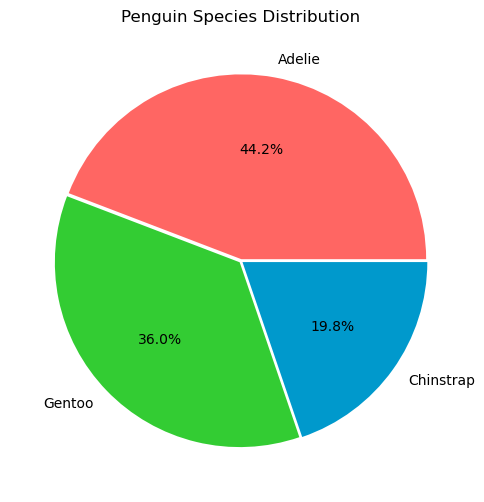

In [342]:
# Code creating a pie chart using plt.
counts = df['species'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(counts, labels=counts.index, explode=[0.01, 0.01, 0.01], autopct='%1.1f%%', colors=['#FF6663', '#33CC33', '#0099CC'])
plt.title('Penguin Species Distribution')
plt.show()

The pie chart illustrates a comparable distribution between Adelie and Gentoo penguins in the collected dataset, but the Chinstrap penguin collected data appears to be significantly lower.

### Bar Chart Depicting The Gender Distribution Among Collected Penguin Data


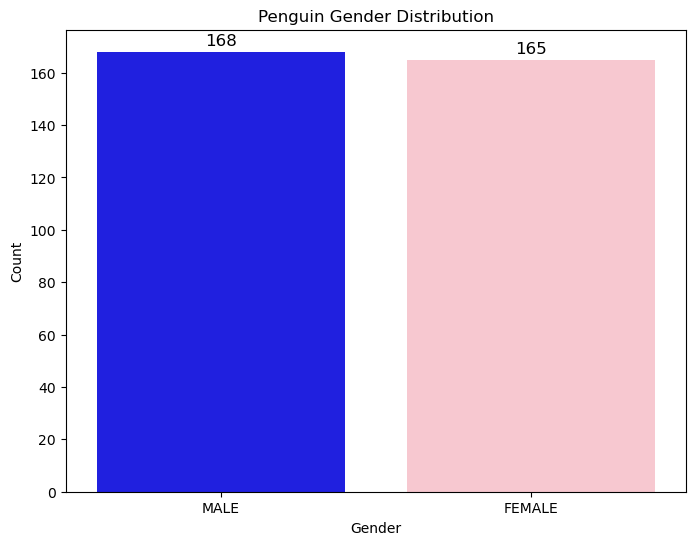

In [343]:
# Code creating a bar chart using plt and sns.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=df, palette=['#0000FF', '#FFC0CB'])

for p in ax.patches: #adding count to each bar.
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')

plt.title('Penguin Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

The bar chart illustrates a nearly equal distribution between male and female penguins in the collected dataset.


### Histogram Depicting Species Distribution Across Islands

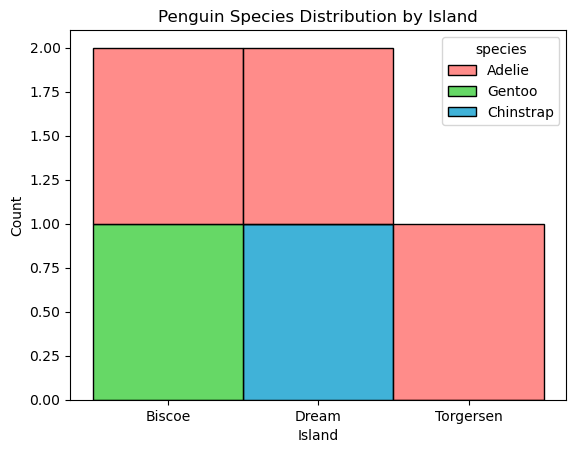

In [344]:
# Code creating a histogram using plt and sns.
grouped = df.groupby(['island', 'species']).size().reset_index(name='count')
# Group the data by island and species

custom_palette = ['#FF6663', '#33CC33', '#0099CC']
sns.histplot(data=grouped, x='island', hue='species', multiple='stack', palette=custom_palette)

plt.title('Penguin Species Distribution by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

The histogram reveals the following distribution of penguin species across the three islands:

* __Adelie__ penguins are present on all three islands.
* __Gentoo__ penguins are exclusively found on __Biscoe Island__.
* __Chinstrap__ penguins are exclusively found on __Dream Island__.

### Histogram Depicting Flipper Lengths Distribution

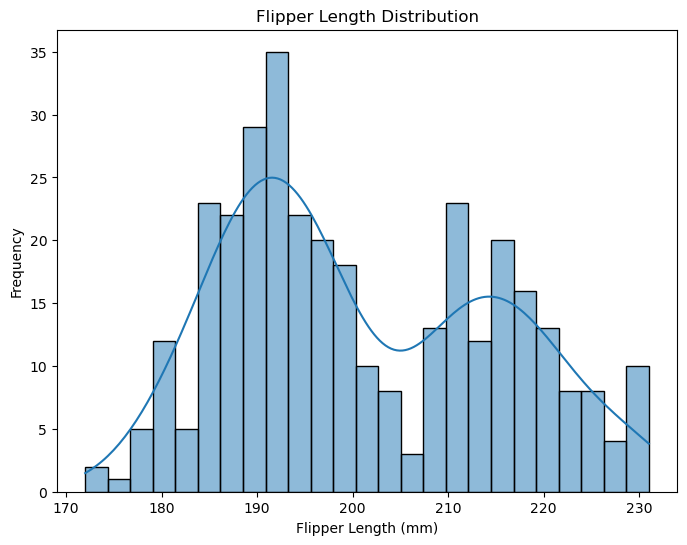

In [345]:
# Code creating a histogram using plt and sns.
plt.figure(figsize=(8, 6))
sns.histplot(df['flipper_length_mm'], kde=True, bins=25) 
# The 'kde' argument is set to True to display a kernel density estimate to help analysing the distribution.
plt.title('Flipper Length Distribution')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

The histogram indicates that the majority of penguins have flipper lengths between __185mm__ and __200mm__, with very few falling below __180mm__ or exceeding __220mm__.

## Two Variable Plots
***

Plotting various two-variable graphs to determine the most suitable one for correlation analysis.

In [346]:
# Define colors for each species
colors = {'Adelie': '#FF6663', 'Gentoo': '#33CC33', 'Chinstrap': '#0099CC'}

Text(0.5, 1.0, 'Bill Depth vs. Bill Length')

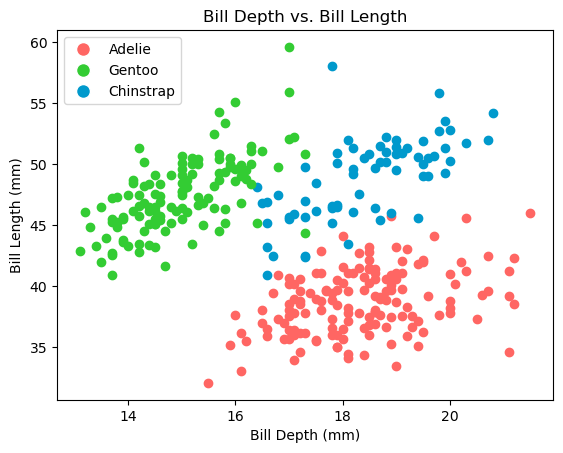

In [347]:
# Create a new figure and set of axes
fig, ax = plt.subplots(1, 1)

# Plot the data points with color coding based on species
for i, species in enumerate(df['species']):
    color = colors.get(species, 'k')  # Get color from dictionary or use black as default
    ax.plot(df['bill_depth_mm'][i], df['bill_length_mm'][i], 'o', c=color)

# Set axis labels
ax.set_xlabel('Bill Depth (mm)')
ax.set_ylabel('Bill Length (mm)')

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=species, markerfacecolor=color, markersize=10)
    for species, color in colors.items()
]
ax.legend(handles=legend_elements, loc='upper left')

# Set title
ax.set_title('Bill Depth vs. Bill Length')

Text(0.5, 1.0, 'Body mass vs Bill depth')

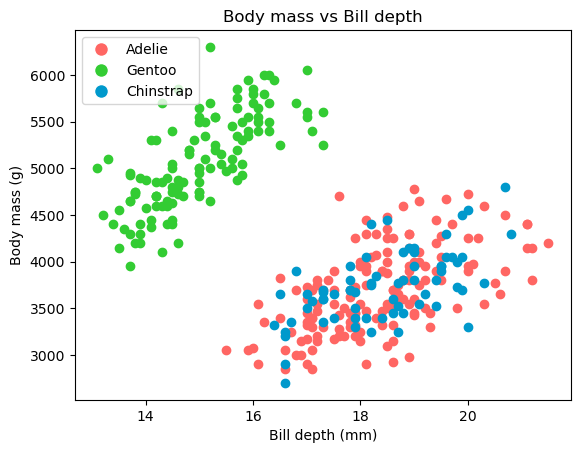

In [348]:
# Create a new figure and set of axes
fig, ax = plt.subplots(1, 1)

# Plot the data points with color coding based on species
for species, fl, bm in zip(df['species'], df['bill_depth_mm'], df['body_mass_g']):
    color = colors.get(species, 'k')  # Get color from dictionary or use black as default
    ax.plot(fl, bm, 'o', c=color)

# Set axis labels
ax.set_xlabel('Bill depth (mm)')
ax.set_ylabel('Body mass (g)')

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=species, markerfacecolor=color, markersize=10)
                   for species, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper left')

# Set title
ax.set_title('Body mass vs Bill depth')

Text(0.5, 1.0, 'Body mass vs flipper length')

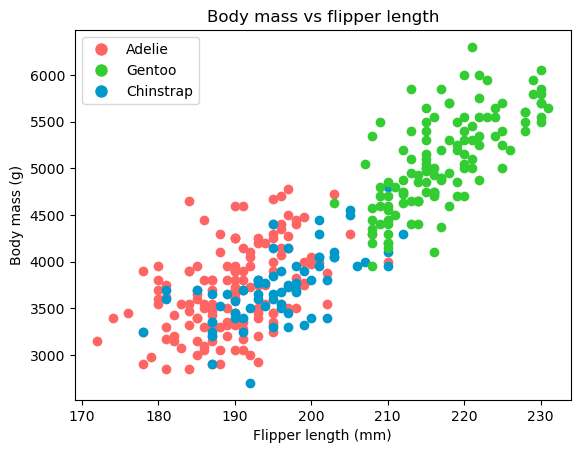

In [349]:
# Create a new figure and set of axes
fig, ax = plt.subplots(1, 1)

# Plot the data points with color coding based on species
for species, fl, bm in zip(df['species'], df['flipper_length_mm'], df['body_mass_g']):
    color = colors.get(species, 'k')  # Get color from dictionary or use black as default
    ax.plot(fl, bm, 'o', c=color)

# Set axis labels
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body mass (g)')

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=species, markerfacecolor=color, markersize=10)
                   for species, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper left')

# Set title
ax.set_title('Body mass vs flipper length')

## Correlation Between Flipper Length and Body Mass

In [357]:
# Calculate the correlation between flipper length and body mass using pandas
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])
# show
#correlation
# Print the correlation with 2 digits after the decimal point
print(f'The correlation between flipper length and body mass is: {correlation:.2f}')

The correlation between flipper length and body mass is: 0.87


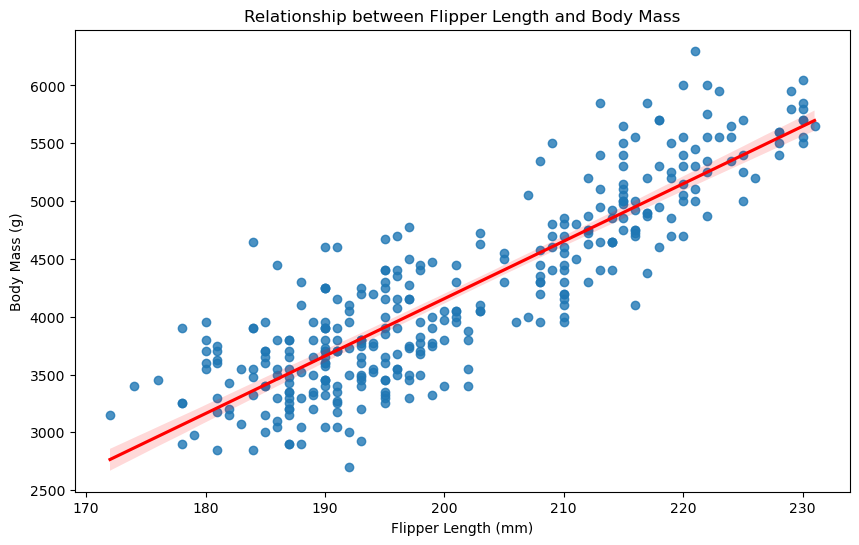

In [358]:
# plotting the correlation with a best fit line

plt.figure(figsize=(10, 6))
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df, line_kws={"color": "red"})
plt.title('Relationship between Flipper Length and Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()



In my conducted analysis, I discovered a __Pearson correlation coefficient of 0.87__ between flipper length and body mass among the Palmer Penguins. This coefficient suggests a __significant positive linear relationship__. In simpler terms, as the flipper length of a penguin increases, its body mass tends to increase as well, and vice versa. The proximity of the coefficient to 1.0 underscores the strength of this association, indicating that flipper length serves as a reliable predictor of body mass in these penguin species.

##### Possible Explanations:

* __Evolutionary Adaptations__: The strong correlation may be attributed to evolutionary adaptations. Larger body mass could necessitate longer flippers for efficient swimming and foraging. This aligns with the biological understanding that aquatic birds with larger body sizes often have longer appendages to maintain optimal swimming dynamics and energy efficiency.

##### Considerations and Further Analysis:

* __Other Factors__: The observed relationship could be influenced by various factors, including the penguins’ age, sex, and the specific ecological demands of their habitat.
Controlling Variables: Further analysis, possibly controlling for these variables, would deepen our understanding of the causative mechanisms behind this relationship.

##### Species-Specific Insights:

* __Variations Within Species__: The high correlation might mask variations within species or populations. Subsequent analyses could explore how this relationship holds across different species of penguins within the dataset. Such investigations might reveal species-specific adaptations or variations in body composition.

##### Conclusion:

The __Pearson correlation coefficient of 0.87__ between flipper length and body mass significantly enhances our understanding of the physical characteristics of the Palmer Penguins. It provides a quantitative basis for further investigations into the physiological and ecological implications of these measurements.

***

## End